/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 0 2 1 2 0 2
 1 2 1 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]
Estimated number of clusters:  3
Estimated number of noise points:  0


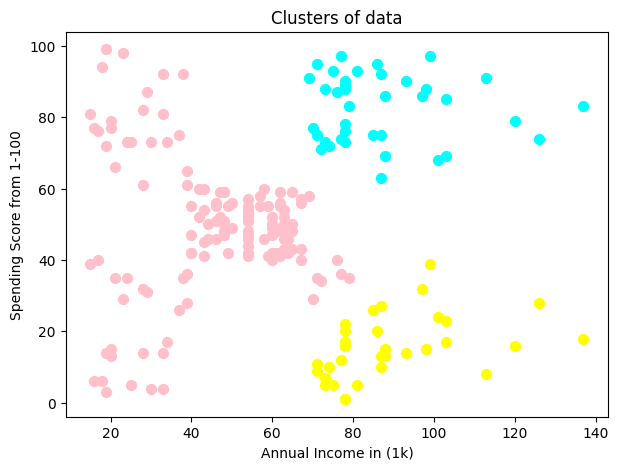

Quality of Clustering:  0.4618340266628975


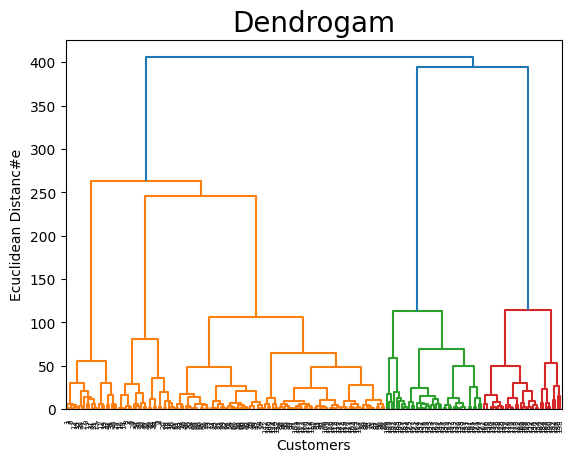

In [1]:
from sklearn.cluster import AgglomerativeClustering
import numpy
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch




data = pd.read_csv("Mall_Customers.csv")
#f1 = data['Age'].values
f2 = data['Annual Income (k$)'].values
f3 = data['Spending Score (1-100)'].values
X = numpy.array(list(zip(f2, f3)))




hc = AgglomerativeClustering(n_clusters = 3,
                             affinity = 'euclidean',
                             linkage = 'ward')
cluster_labels = hc.fit_predict(X)
print(cluster_labels)

n_clusters_ = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
n_noise_ = list(cluster_labels).count(-1)

print("Estimated number of clusters: " , n_clusters_)
print("Estimated number of noise points: " , n_noise_)

plt.figure(figsize=(7,5))
plt.scatter(X[cluster_labels == 0, 0], X[cluster_labels == 0, 1], s = 50, c = 'pink')
plt.scatter(X[cluster_labels == 1, 0], X[cluster_labels == 1, 1], s = 50, c = 'yellow')
plt.scatter(X[cluster_labels == 2, 0], X[cluster_labels == 2, 1], s = 50, c = 'cyan')
plt.scatter(X[cluster_labels == 3, 0], X[cluster_labels == 3, 1], s = 50, c = 'magenta')
plt.scatter(X[cluster_labels == 4, 0], X[cluster_labels == 4, 1], s = 50, c = 'orange')
plt.scatter(X[cluster_labels == 5, 0], X[cluster_labels == 5, 1], s = 50, c = 'blue')
plt.scatter(X[cluster_labels == 6, 0], X[cluster_labels == 6, 1], s = 50, c = 'red')
plt.scatter(X[cluster_labels == 7, 0], X[cluster_labels == 7, 1], s = 50, c = 'black')
plt.scatter(X[cluster_labels == 8, 0], X[cluster_labels == 8, 1], s = 50, c = 'green')
plt.xlabel('Annual Income in (1k)')
plt.ylabel('Spending Score from 1-100')
plt.title('Clusters of data')
plt.show()
if(n_clusters_ > 1):
  sil = silhouette_score(X, cluster_labels,
                         metric='euclidean',
                         sample_size = len(data))
  print("Quality of Clustering: ", sil)

dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distanc#e')
plt.show()